### спрятать

In [ ]:
# You need these lines in Google Colab

from google.colab import output
output.enable_custom_widget_manager()
"""
Magic capture supresses the output of the cell to prevent
long output of already satisfied dependencies.
Remove this line to enable cell output
"""
# %%capture
!pip install ipympl
!matplotlib widget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:00
/bin/bash: line 1: matplotlib: command not found


Существует механическая система. Она движется под действием силы гравитации. Обобщенными координатами являются $x$ и $\xi$. Скольжения нет. Тело $1$ - частица. Тело $3$ - однородный диск;

Задачи следующие:
- найти уравнение движения для этой системы;
- смоделировать эту систему (получить все положения) или построить графики для каждого тела $x(t),\ y(t)$.
Необходимые переменные:

$m_1=1,\ m_2=3,\ m_3=2$;

$b = 0.001$, где $b$ - коэффициент вязкого сопротивления;

Начальные условия: $x_0=0,\ \dot{x}_0=0,\ \xi_0=0,\ \dot{\xi}_0=3$.

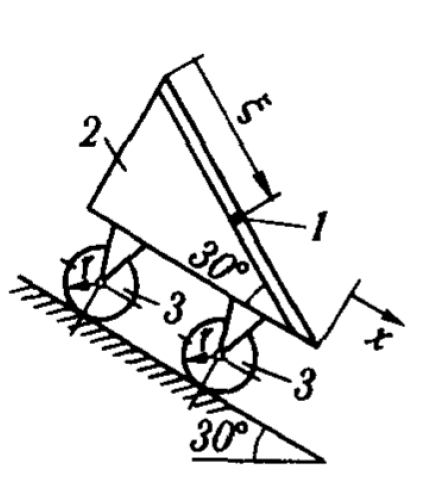

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import ode
from sympy import Symbol, Point2D, Point3D, Derivative, Function
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import Polygon, Circle

In [ ]:
class SimPlot:
    fig, ax = None, None

    lines = []
    titles = []
    points = []
    vectors = []
    patches = []

    def __init__(self, xlim, ylim):
        self.fig, self.ax = plt.subplots()
        self.ax.set_xlim(xlim[0], xlim[1])
        self.ax.set_ylim(ylim[0], ylim[1])
        self.ax.set_aspect("equal")

    def plot_lines(self, in_lines, in_colors=[]):
        colors = in_colors + ['black'] * (len(in_lines) - len(in_colors))

        self.lines.extend([
            plt.plot([u[0], v[0]], [u[1], v[1]], color=color)
            for [u, v], color in zip(in_lines, colors)
        ])

    def plot_points(self, in_points, in_sizes=[], in_colors=[]):
        colors = in_colors + ['black'] * (len(in_points) - len(in_colors))
        sizes = in_sizes + [3] * (len(in_points) - len(in_sizes))

        self.points.extend([
            plt.plot([x], [y], marker='o', markersize=size, color=color)
            for [x, y], size, color in zip(in_points, sizes, colors)
        ])

    def plot_titles(self, coords, titles, ofx=0, ofy=0):
        self.titles.extend([
            self.ax.text(x + ofx, y + ofy, title)
            for [x, y], title in zip(coords, titles)
        ])

    def plot_vectors(self, vectors_u, vectors_v, titles, scale=1, in_colors=[]):
        colors = in_colors + ['black'] * (len(vectors_u) - len(in_colors))
        self.vectors.extend([
            plt.quiver(float(u[0]), float(u[1]), float(v[0]), float(v[1]), color=color, scale=scale, angles='xy', units='xy', scale_units='xy')
            for u, v, color in zip(vectors_u, vectors_v, colors)
        ])

        self.plot_titles([u + v / scale for u, v in zip(vectors_u, vectors_v)], titles)

    def add_patch(self, patch):
        self.ax.add_patch(patch)
        self.patches.append(patch)


    def clear_plot(self):
        while len(self.lines):
            self.lines[-1][0].remove()
            self.lines.pop()

        while len(self.titles):
            self.titles[-1].remove()
            self.titles.pop()

        while len(self.points):
            self.points[-1][0].remove()
            self.points.pop()

        while len(self.vectors):
            self.vectors[-1].remove()
            self.vectors.pop()

        while len(self.patches):
            self.patches[-1].remove()
            self.patches.pop()

In [ ]:
t = Symbol('t')
x = Function('x')(t)
xi = Function(r'\xi')(t)

In [ ]:
ce = 0.000108108 * t

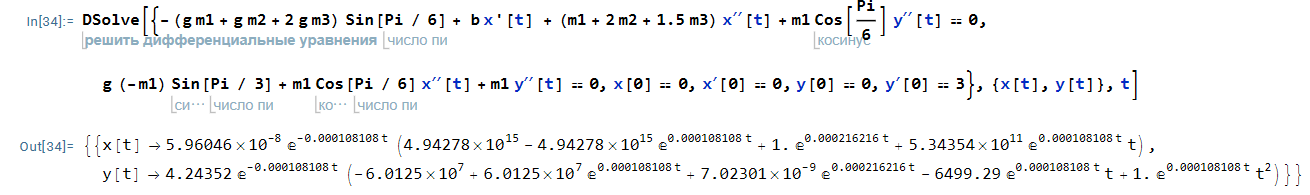

In [ ]:
x = 5.96046 * 1e-8 * sp.exp(-ce) * (4.94278 * 1e15 - 4.94278 * 1e15 * sp.exp(ce) + sp.exp(2 * ce) + 5.34354 * 1e11 * sp.exp(ce) * t)
xi = 4.24352 * sp.exp(-ce) * (-6.0125 * 1e7 + 6.0125 * 1e7 * sp.exp(ce) + 7.02301 * 1e-9 * sp.exp(2 * ce) - 6499.29 * sp.exp(ce) * t + sp.exp(ce) * t**2)

In [ ]:
display(x, xi)

5.96046e-8*(534354000000.0*t*exp(0.000108108*t) - 4.94278e+15*exp(0.000108108*t) + exp(0.000216216*t) + 4.94278e+15)*exp(-0.000108108*t)

4.24352*(t**2*exp(0.000108108*t) - 6499.29*t*exp(0.000108108*t) + 60125000.0*exp(0.000108108*t) + 7.02301e-9*exp(0.000216216*t) - 60125000.0)*exp(-0.000108108*t)

In [ ]:
t_end = 0.47

In [ ]:
A = Point2D(x * sp.cos(sp.pi / 6), -x * sp.sin(sp.pi / 6))
B = Point2D(A[0] + sp.sqrt(3) * sp.cos(sp.pi / 6), A[1] - sp.sqrt(3) * sp.sin(sp.pi / 6))
C = Point2D(A[0] + sp.cos(sp.pi / 3), A[1] + sp.sin(sp.pi / 3))
M = Point2D(C[0] + xi * sp.cos(sp.pi / 3), C[1] - xi * sp.sin(sp.pi / 3))

In [ ]:
r = 0.25

In [ ]:
O1 = Point2D(((B - A) / 4 + A)[0] - r * sp.cos(sp.pi / 3), ((B - A) / 4 + A)[1] - r * sp.sin(sp.pi / 3))
O2 = Point2D((3 * (B - A) / 4 + A)[0] - r * sp.cos(sp.pi / 3), (3 * (B - A) / 4 + A)[1] - r * sp.sin(sp.pi / 3))

In [ ]:
W1 = Point2D(O1[0] + r * sp.cos(-sp.diff(x) / r), O1[1] + r * sp.sin(-sp.diff(x) / r))
W2 = Point2D(O2[0] + r * sp.cos(-sp.diff(x) / r), O2[1] + r * sp.sin(-sp.diff(x) / r))

In [ ]:
L1 = Point2D(-2 * r * sp.cos(sp.pi / 3), -2 * r * sp.sin(sp.pi / 3))
L2 = Point2D(-2 * r * sp.cos(sp.pi / 3) + 2.5 * sp.cos(sp.pi / 6), -2 * r * sp.sin(sp.pi / 3) - 2.5 * sp.sin(sp.pi / 6))
L3 = Point2D(L1[0], L2[1])

In [ ]:
model = SimPlot([-1, 2], [-2, 1])

model.ax.axis('off')

ln, = plt.plot([], [], 'b--')

def update_anim(frame):
    [A_frame, B_frame, C_frame] = [P.subs(t, frame).evalf() for P in [A, B, C]]
    M_frame = M.subs(t, frame).evalf()
    [O1_frame, O2_frame] = [P.subs(t, frame).doit().evalf() for P in [O1, O2]]
    [W1_frame, W2_frame] = [P.subs(t, frame).doit().evalf() for P in [W1, W2]]
    [L1_frame, L2_frame, L3_frame] = [P.subs(t, frame).doit().evalf() for P in [L1, L2, L3]]

    model.clear_plot()

    model.add_patch(Polygon([A_frame, B_frame, C_frame], fill=False, hatch='//'))
    model.add_patch(Circle(O1_frame, r, fill=False, color='black'))
    model.add_patch(Circle(O2_frame, r, fill=False, color='black'))
    model.plot_lines([[W1_frame, O1_frame], [W2_frame, O2_frame], [L1_frame, L2_frame], [L2_frame, L3_frame]])
    model.plot_points([M_frame], in_sizes=[5], in_colors=['red'])
    model.plot_titles([M_frame], ['M'], ofx=0.05)
    return ln,

t_end = float(t_end)
frames = np.linspace(0, t_end, 100)

anim = FuncAnimation(model.fig, update_anim, frames=frames, blit=True)
from IPython.display import HTML, display
display(HTML(anim.to_jshtml()))
plt.close('all')

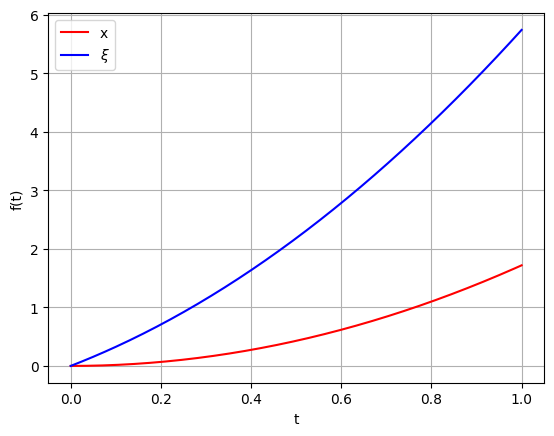

In [ ]:
fig = plt.subplot()

plt.xlabel('t')
plt.ylabel('f(t)')

frames = np.linspace(0, 1, 200)
xs = [x.subs(t, frame) for frame in frames]
xis = [xi.subs(t, frame) for frame in frames]

plt.plot(frames, xs, color='red', label='x')
plt.plot(frames, xis, color='blue', label=r'$\xi$')

plt.grid()
plt.legend()
plt.savefig('xsxis.png')